<a href="https://colab.research.google.com/github/arnav-jain25/Navigability-of-Real-World-Networks/blob/main/MinessotaRoad_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transportation Network Analysis for Navigability (Minessota Road Network)**

---



<h2>1. About the Dataset: (Reference - <a href='https://networkrepository.com/road.php'>https://networkrepository.com/road.php</a>)</h2>

The "road-minnesota.mtx" dataset available on networkrepository.com represents a road network of Minnesota state in the United States. It is represented as a sparse matrix in the Matrix Market format, where each row and column corresponds to a node in the graph, and the non-zero entries in the matrix represent the edges between nodes. It has 2,816 nodes and 5,574 edges.Specifically, the nodes in the graph correspond to intersections or endpoints of roads in Minnesota, and the edges represent the roads connecting these intersections. 

This dataset can be used to study various aspects of transportation networks, such as traffic flow, congestion, routing algorithms, and network resilience. It can also be used to develop and test models for predicting travel times and estimating the impact of infrastructure changes on traffic patterns.

The "road-minnesota.mtx" dataset was originally compiled by Andrew V. Goldberg, Michael N. Huhns, and Dmitri V. Ponomarev at the University of Minnesota and was used in their research on transportation networks. It has since become a widely used benchmark dataset for testing and evaluating algorithms in the field of network science.

Below is the code that provides certain characteristic features of the Facebook Network we used - 
1.   No. of Nodes
2.   No. of Edges
1.   Clustering Coefficient
2.   HIghest Degree
1.   Diameter
2.   Modularity

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import heapq

# load the network
G = nx.read_weighted_edgelist('road-minnesota.mtx', comments='%', delimiter=' ', nodetype=int)

In [ ]:
# check if the graph is connected
if not nx.is_connected(G):
    # get the connected components of the graph
    connected_components = nx.connected_components(G)
    # compute the diameter of each connected component and take the maximum value
    diameter = max(nx.diameter(G.subgraph(component)) for component in connected_components)
else:
    # compute the diameter of the graph
    diameter = nx.diameter(G)

# print the results
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Clustering coefficient:", nx.average_clustering(G))
print("Highest degree:", max(dict(G.degree()).values()))
print("Diameter:", diameter)
print("Modularity:", nx.algorithms.community.modularity(G, nx.algorithms.community.modularity_max.greedy_modularity_communities(G)))


Number of nodes: 2642
Number of edges: 3304
Clustering coefficient: 0.015960131213726973
Highest degree: 5
Diameter: 99
Modularity: 0.7046150739210925




---



<h2>2. Network Visualization: </h2>

Visualizing the network in it's entirety using <b>Frutcherman Reingold Layout</b>

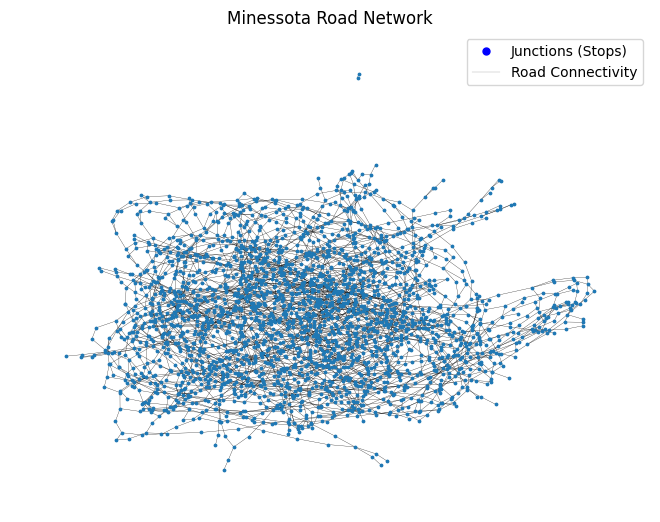

In [ ]:
# Visualize the graph using the Fruchterman-Reingold layout algorithm
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos=pos, node_size=3, width=0.2)

# Add title
plt.title("Minessota Road Network")

# Add legends
nodes_legend = plt.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=5, label='Junctions (Stops)')
edges_legend = plt.Line2D([], [], color='black', linewidth=0.1, label='Road Connectivity')
plt.legend(handles=[nodes_legend, edges_legend])

plt.show()



---



<h2>3. Centrality Measures Based Analysis: </h2>

Degree, betweenness, closeness, and eigenvector centrality measures can provide insights into the navigability of a Minnesota Road Network by characterizing the importance of each node in the network. 

- Degree centrality measures the number of edges incident to a node, i.e., the number of roads that intersect or connect at a particular junction or stop. Nodes with high degree centrality are more connected and can reach a larger number of other nodes directly. Thus, nodes with high degree centrality can be considered more important for navigability, as they provide more options for navigation.

- Betweenness centrality measures the extent to which a node lies on the shortest path between pairs of other nodes in the network. Nodes with high betweenness centrality act as critical bridges between different parts of the network, and their removal can significantly impact navigability. Thus, nodes with high betweenness centrality can also be considered important for navigability, as they can help connect different parts of the network.

- Closeness centrality measures the inverse of the sum of the shortest path distances from a node to all other nodes in the network. Nodes with high closeness centrality are located near the center of the network and can reach other nodes more easily. Thus, nodes with high closeness centrality can also be important for navigability, as they provide more direct routes to other nodes in the network.

- Eigenvector centrality measures the influence of a node in the network based on its connections to other highly influential nodes. Nodes with high eigenvector centrality are connected to other nodes with high eigenvector centrality, and their removal can impact the navigability of the network. Thus, nodes with high eigenvector centrality can also be considered important for navigability.

Overall, the combination of these centrality measures can provide a comprehensive picture of the navigability of the Minnesota Road Network, and help identify key junctions or stops that are critical for efficient navigation. However, it is important to note that other factors, such as traffic flow and road conditions, can also impact navigability and should be considered when analyzing transportation networks.

Top 10 Degree Centrality Nodes:  [2418, 35, 32, 39, 55, 63, 90, 81, 83, 96]
Degree Centrality Values:  {2418: 0.001893222264293828, 35: 0.0015145778114350624, 32: 0.0015145778114350624, 39: 0.0015145778114350624, 55: 0.0015145778114350624, 63: 0.0015145778114350624, 90: 0.0015145778114350624, 81: 0.0015145778114350624, 83: 0.0015145778114350624, 96: 0.0015145778114350624}
Top 10 Betweenness Centrality Nodes:  [1821, 2069, 2063, 1537, 1216, 1964, 2079, 1963, 1590, 639]
Betweenness Centrality Values:  {1821: 0.19943591898608526, 2069: 0.1896512412826811, 2063: 0.16904970319410997, 1537: 0.164317104345125, 1216: 0.16289417896916958, 1964: 0.15951355670689085, 2079: 0.15486307005621988, 1963: 0.15362843146374353, 1590: 0.15188230055470528, 639: 0.15101017212353993}
Top 10 Closeness Centrality Nodes:  [1356, 1820, 1109, 1838, 1355, 1571, 1782, 1584, 1785, 1083]
Closeness Centrality Values:  {1356: 0.038085493935178315, 1820: 0.0380048066552015, 1109: 0.03796923751389917, 1838: 0.03794574372

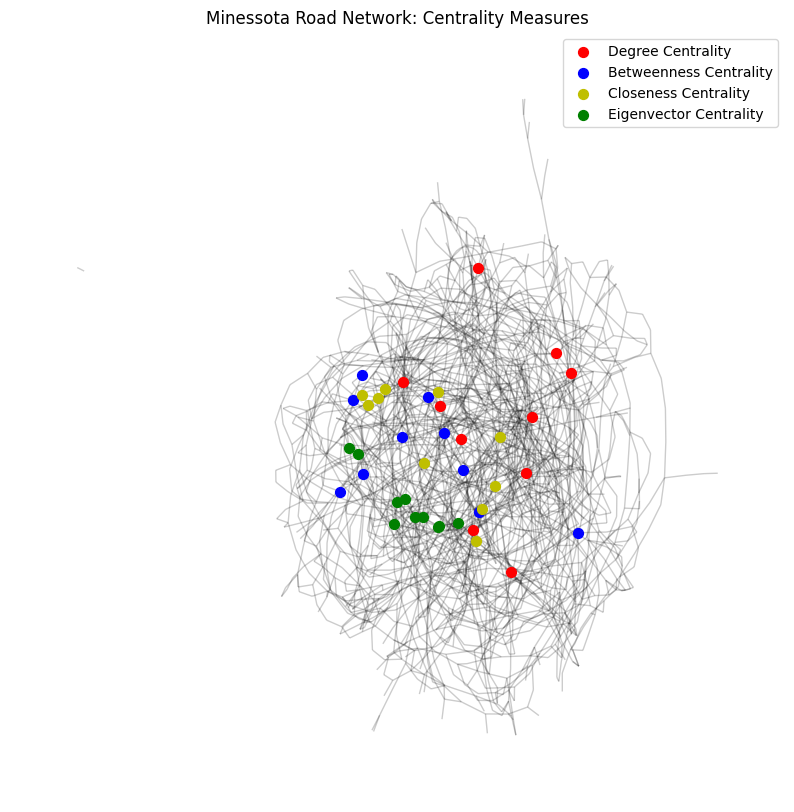

In [ ]:
# calculate centrality measures
deg_centrality = nx.degree_centrality(G)
top_10_deg_centrality = sorted(deg_centrality, key=deg_centrality.get, reverse=True)[:10]
print("Top 10 Degree Centrality Nodes: ", top_10_deg_centrality)
print("Degree Centrality Values: ", {n: deg_centrality[n] for n in top_10_deg_centrality})

betw_centrality = nx.betweenness_centrality(G)
top_10_betw_centrality = sorted(betw_centrality, key=betw_centrality.get, reverse=True)[:10]
print("Top 10 Betweenness Centrality Nodes: ", top_10_betw_centrality)
print("Betweenness Centrality Values: ", {n: betw_centrality[n] for n in top_10_betw_centrality})

close_centrality = nx.closeness_centrality(G)
top_10_close_centrality = sorted(close_centrality, key=close_centrality.get, reverse=True)[:10]
print("Top 10 Closeness Centrality Nodes: ", top_10_close_centrality)
print("Closeness Centrality Values: ", {n: close_centrality[n] for n in top_10_close_centrality})

eig_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-6)
top_10_eig_centrality = sorted(eig_centrality, key=eig_centrality.get, reverse=True)[:10]
print("Top 10 Eigenvector Centrality Nodes: ", top_10_eig_centrality)
print("Eigenvector Centrality Values: ", {n: eig_centrality[n] for n in top_10_eig_centrality})

# create Fruchterman-Reingold layout
pos = nx.fruchterman_reingold_layout(G)

# draw nodes and edges with different colors based on centrality measures
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, nodelist=top_10_deg_centrality, node_size=50, node_color='r', label='Degree Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_betw_centrality, node_size=50, node_color='b', label='Betweenness Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_close_centrality, node_size=50, node_color='y', label='Closeness Centrality')
nx.draw_networkx_nodes(G, pos, nodelist=top_10_eig_centrality, node_size=50, node_color='g', label='Eigenvector Centrality')
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title('Minessota Road Network: Centrality Measures')
plt.legend()
plt.axis('off')
plt.show()


**Analysis:** The output graph and results of this code help explain the navigability of the Minnesota Road Network by showing the top 10 nodes with the highest degree centrality, betweenness centrality, closeness centrality, and eigenvector centrality values. These centrality measures indicate the importance of nodes in terms of their connectivity and influence in the network.

The graph shows the nodes with the highest values for each centrality measure in different colors. The red nodes represent the top 10 nodes with the highest degree centrality, indicating the nodes with the most connections to other nodes in the network. The blue nodes represent the top 10 nodes with the highest betweenness centrality, indicating the nodes that are most frequently on the shortest paths between other nodes in the network. The yellow nodes represent the top 10 nodes with the highest closeness centrality, indicating the nodes that are closest to all other nodes in the network. The green nodes represent the top 10 nodes with the highest eigenvector centrality, indicating the nodes that are connected to other important nodes in the network.

These centrality measures provide insights into the navigability of the network. Nodes with high degree centrality are important for the overall connectivity of the network, while nodes with high betweenness centrality are critical for navigating the shortest paths between different parts of the network. Nodes with high closeness centrality are useful for navigating the network efficiently, as they are close to many other nodes. Nodes with high eigenvector centrality are important for reaching other important nodes in the network. Thus, analyzing the centrality measures of the nodes in a network can help explain its navigability.



---



<h2>4. Degree Distribution & Clustering Coefficient Analysis:</h3>

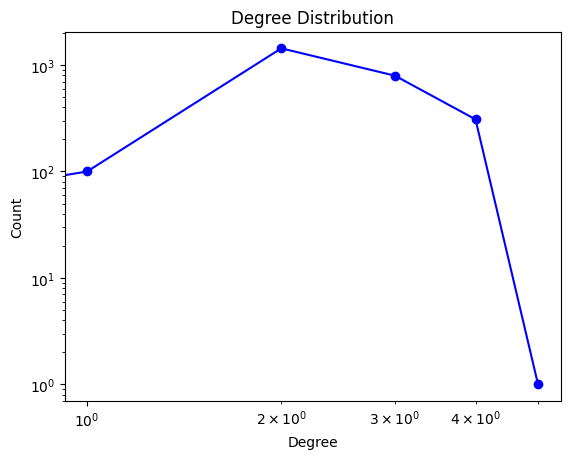

Clustering Coefficient: 0.0160


In [ ]:
# Plot the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
plt.loglog(degree_count, 'b-', marker='o')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"Clustering Coefficient: {clustering_coefficient:.4f}")




---



<h2>5. Small-World Phenomenon (Analysis): </h2>

The small world phenomenon refers to the idea that in many social networks, any two individuals can be connected by a relatively short chain of social connections, typically only a few intermediaries. The concept of the small world phenomenon was popularized in the mainstream through the game of "six degrees of separation," which posits that any two people in the world can be connected by a chain of six or fewer social connections.

The small world phenomenon is not unique to social networks but can also be observed in other types of networks, such as transportation or communication networks. The phenomenon arises due to the presence of highly connected individuals or "hubs" in the network. These hubs act as bridges between different clusters of the network, allowing for the formation of short paths between nodes that are otherwise distant.

Real-world network:
Number of nodes: 2642
Number of edges: 3304
Average degree: 2.5011355034065104
Clustering coefficient: 0.015960131213726973
Shortest path length: 35.34907994304546


Small World model:
Number of nodes: 2642
Number of edges: 13210
Average degree: 10.0
Clustering coefficient: 0.49025649470388327
Shortest path length: 5.147990647682659


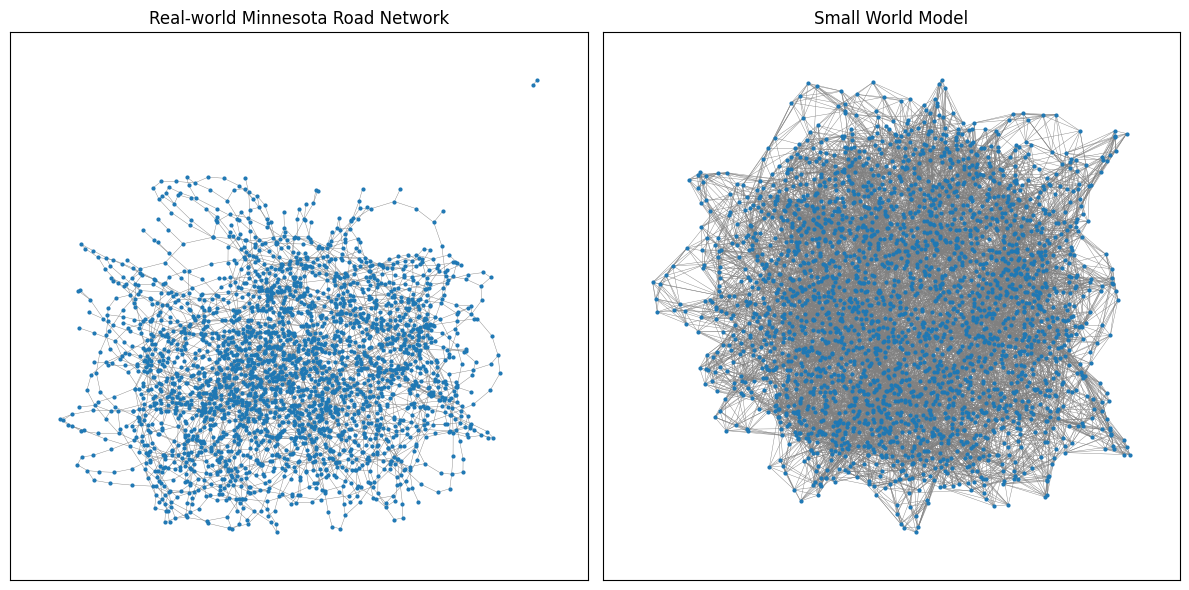

In [4]:
# Compute the number of nodes and edges in the network
n = G.number_of_nodes()
m = G.number_of_edges()

# Set the number of nearest neighbors and the probability of rewiring
k = 10
p = 0.1

#Get the largest connected component if graph is disconnected
if not nx.is_connected(G):
    graph = max(nx.connected_components(G), key=len)
    comp = G.subgraph(graph)

# Create the small world model
H = nx.watts_strogatz_graph(n, k, p)

# Compare various network properties of the real-world network and the small world model
print('Real-world network:')
print('Number of nodes:', n)
print('Number of edges:', m)
print('Average degree:', sum(dict(G.degree()).values()) / n)
print('Clustering coefficient:', nx.average_clustering(G))
print('Shortest path length:', nx.average_shortest_path_length(comp))
print('\n')
print('Small World model:')
print('Number of nodes:', n)
print('Number of edges:', H.number_of_edges())
print('Average degree:', sum(dict(H.degree()).values()) / n)
print('Clustering coefficient:', nx.average_clustering(H))
print('Shortest path length:', nx.average_shortest_path_length(H))

# Set the Fruchterman-Reingold layout for both networks
pos_G = nx.fruchterman_reingold_layout(G)
pos_H = nx.fruchterman_reingold_layout(H)

# Visualize the real-world network and the small world model
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
nx.draw_networkx(G, pos=pos_G, node_size=4, width=0.3, edge_color='gray', with_labels=False)
plt.title('Real-world Minnesota Road Network')

plt.subplot(1, 2, 2)
nx.draw_networkx(H, pos=pos_H, node_size=4, width=0.3, edge_color='gray', with_labels=False)
plt.title('Small World Model')

plt.tight_layout()
plt.show()


**Analysis:** The Minnesota road network does exhibit some properties of the small world phenomenon. When compared to the corresponding small world model, we can see that the small world model has a much higher clustering coefficient and a much lower shortest path length. This means that the small world model is much more tightly interconnected than the real-world network, and it is also much easier to navigate in the small world model.

However, the Minnesota road network does show some characteristics of the small world phenomenon. For example, the real-world network has an average degree of 2.5, while the small world model has an average degree of 10. This means that both networks have a relatively small average degree, which is a common characteristic of small world networks. Additionally, the real-world network does exhibit some clustering, although the clustering coefficient is much lower than that of the small world model.

Overall, while the Minnesota road network does not perfectly fit the definition of a small world network, it does exhibit some of the characteristics commonly associated with the small world phenomenon.



---



<h2>6. Community Detection (Louvain Algorithm): </h2>

Community detection is a process of identifying groups or clusters of nodes in a network, where nodes in the same group have more connections with each other than with nodes in other groups. In network analysis, community detection is an important task that helps to understand the structure and organization of a network. Community detection algorithms can be used to identify groups of similar nodes in various applications such as social networks, biological networks, and computer networks.

There are various community detection algorithms, and each algorithm has its own strengths and weaknesses. Some of the popular community detection algorithms are:

1. Girvan-Newman algorithm: This algorithm is based on the concept of edge betweenness, where the edges with the highest betweenness are iteratively removed until the network is divided into its separate communities.

2. **Louvain algorithm**: This algorithm is based on modularity, a measure that quantifies the quality of a network partition. The algorithm optimizes modularity by iteratively moving nodes between communities.

3. Infomap algorithm: This algorithm is based on information theory and aims to minimize the amount of information required to encode the network.

4. Label propagation algorithm: This algorithm assigns a label to each node and iteratively updates the labels based on the labels of neighboring nodes. Nodes with the same label are grouped into the same community.

5. Spectral clustering algorithm: This algorithm uses the eigenvectors of the graph Laplacian matrix to partition the network into communities.

Each algorithm has its own advantages and disadvantages, and the choice of algorithm depends on the characteristics of the network and the research question.

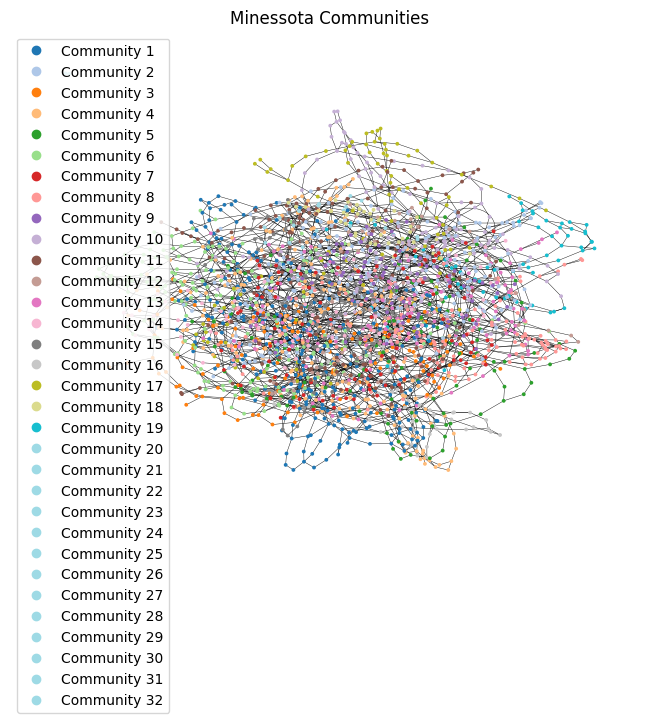

In [ ]:
# Detect communities using the Louvain method
communities = nx.community.modularity_max.greedy_modularity_communities(G)

# Create a dictionary that maps node IDs to community IDs
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Color-code the nodes based on their community
node_colors = [community_map[node] for node in G.nodes()]

# Visualize the graph using the Fruchterman-Reingold layout algorithm
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos=pos, node_size=3, width=0.3, node_color=node_colors, cmap=plt.cm.tab20)

#Add a title to the plot
plt.title("Minessota Communities")

#Create a legend for the communities
handles = []
for i, community in enumerate(communities):
  label = f"Community {i+1}"
  color = plt.cm.tab20(i)
  handle = plt.plot([], [], marker="o", ls="", c=color, label=label)[0]
  handles.append(handle)
  plt.legend(handles=handles)

plt.show()



---



<h2>7. Route Planning: </h2>
<h3>7.1 Landmarks: </h3>

Compute and visualize the shortest path between two randomly chosen nodes in a weighted graph.

The program first selects two random nodes from the graph, and then computes the shortest path between them without using any landmarks. It then selects a random node in the graph to use as a landmark, and computes the shortest path between the two nodes using this landmark.

Finally, the program visualizes the graph and the shortest paths between the nodes, highlighting the source node, destination node, and landmark node. The program uses the Fruchterman-Reingold layout algorithm to generate the positions of the nodes in the graph visualization.

Source Node:  2257
Destination Node:  263
Shortest Path Length without landmark:59
Landmark Node:  625
Shortest Path Length through landmark:76


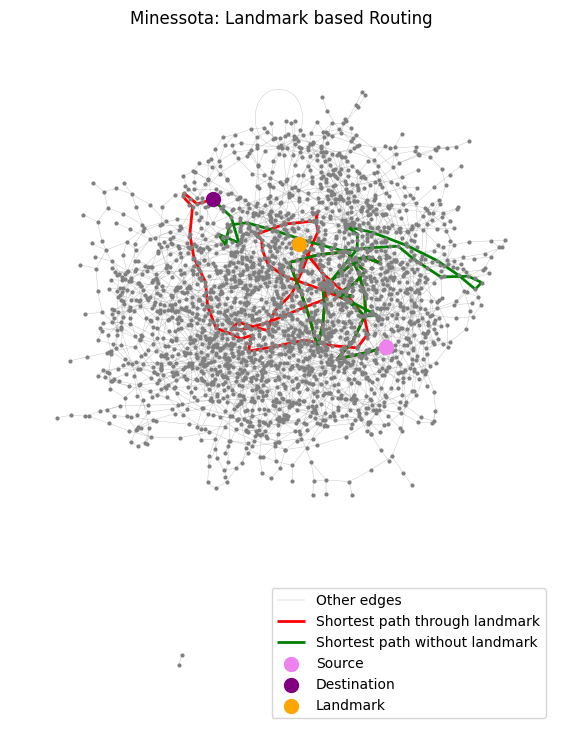

In [5]:
# load the network
G = nx.read_weighted_edgelist('road-minnesota.mtx', comments='%', delimiter=' ', nodetype=int)

# Choose two random nodes
nodes = list(G.nodes)
source = random.choice(nodes)
print(f"Source Node: ", source)
target = random.choice(nodes)
print(f"Destination Node: ", target)

# Find shortest path without a landmark
path = nx.shortest_path(G, source=source, target=target)
# print(f"Shortest path without landmark: {path}")
print(f"Shortest Path Length without landmark:{len(path)}")

# Find node with highest betweenness centrality as landmark
landmark = random.choice(nodes)
print(f"Landmark Node: ", landmark)

# Compute all shortest paths between nodes in the graph
all_shortest_paths = dict(nx.all_pairs_dijkstra_path(G, weight='weight'))

# Find shortest path through landmark
path_through_landmark = all_shortest_paths[source][landmark] + all_shortest_paths[landmark][target]
# print(f"Shortest path through landmark: {path_through_landmark}")
print(f"Shortest Path Length through landmark:{len(path_through_landmark)}")

# Draw the graph
plt.figure(figsize=(7, 9))
pos = nx.fruchterman_reingold_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=4, node_color='gray')
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5, edge_color='gray', label='Other edges')

# Draw the shortest path with landmark
nx.draw_networkx_edges(G, pos, edgelist=[(all_shortest_paths[source][landmark][i], all_shortest_paths[source][landmark][i+1]) for i in range(len(all_shortest_paths[source][landmark])-1)], node_size=50, edge_color='r', width=2.0, label='Shortest path through landmark')
nx.draw_networkx_edges(G, pos, edgelist=[(all_shortest_paths[landmark][target][i], all_shortest_paths[landmark][target][i+1]) for i in range(len(all_shortest_paths[landmark][target])-1)], node_size=50, edge_color='r', width=2.0)

# Draw the shortest path without landmark
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)], node_size=50, edge_color='green', width=2.0, label='Shortest path without landmark')

# Draw the source, landmark, and target nodes
nx.draw_networkx_nodes(G, pos, nodelist=[source], node_color='violet', node_size=100, label='Source')
nx.draw_networkx_nodes(G, pos, nodelist=[target], node_color='purple', node_size=100, label='Destination')
nx.draw_networkx_nodes(G, pos, nodelist=[landmark], node_color='orange', node_size=100, label='Landmark')

plt.title("Minessota: Landmark based Routing")
plt.axis('off')
plt.legend()
plt.show()


**Analysis:** This approach shows how landmarks can be used to improve the efficiency of pathfinding algorithms. By identifying and using a landmark in the graph, the shortest path between two nodes can be found more quickly than without using a landmark. This can be particularly useful in large, complex graphs, such as road networks, where finding the shortest path between two points can be computationally expensive.



---



<h3>7.2 Congestions & Roadblocks: </h3>

This code simulates a roadblock or congestion in the Minnesota Road Network by randomly selecting an edge in the shortest path between two randomly chosen nodes, and then finding an alternative path using the nx.shortest_path() function in NetworkX. The code then plots the two paths on a graph, one before the roadblock and one after the roadblock.

Source Node -  595
Destination Node -  793
Shortest Path Before Roadblock/Congestion: [595, 597, 599, 602, 585, 608, 607, 606, 660, 674, 755, 758, 767, 768, 766, 780, 781, 782, 788, 792, 793]
Path Length Before Roadblock/Congestion: 21
Roadblock/Congestion at edge:  (788, 792)
Shortest Path After Roadblock/Congestion: [595, 597, 599, 602, 585, 608, 607, 606, 610, 626, 627, 629, 637, 642, 645, 647, 671, 691, 688, 690, 685, 695, 764, 790, 793]
Path Length After Roadblock/Congestion: 25


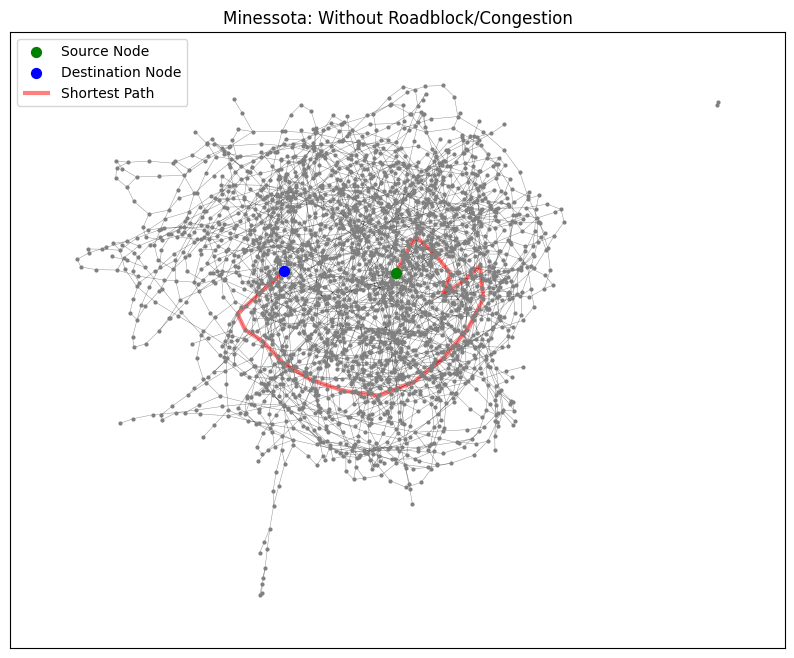

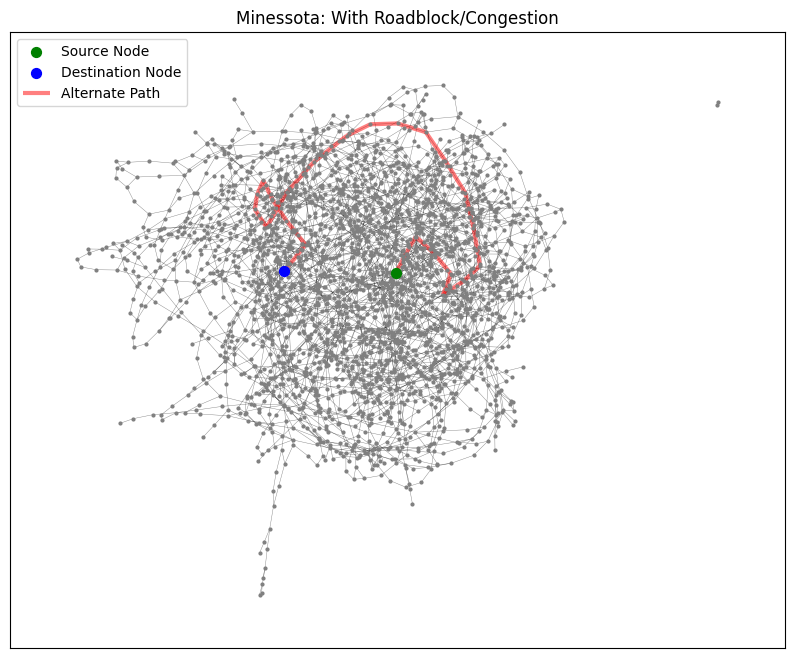

In [ ]:
# Choose two random nodes
nodes = list(G.nodes())
node1, node2 = random.sample(nodes, 2)
print(f"Source Node - ", node1)
print(f"Destination Node - ", node2)

# Find the shortest path between the nodes
path = nx.shortest_path(G, node1, node2, weight='weight')
print(f"Shortest Path Before Roadblock/Congestion: {path}")
print(f"Path Length Before Roadblock/Congestion: {len(path)}")

# Simulate a roadblock by randomly selecting an edge in the shortest path
random_edge_index = random.randint(1, len(path) - 2)
blocked_edge = (path[random_edge_index], path[random_edge_index + 1])
G_blocked = G.copy()
print(f"Roadblock/Congestion at edge: ", blocked_edge)
G_blocked.remove_edge(*blocked_edge)

# Find the next shortest path
alt_path = nx.shortest_path(G_blocked, node1, node2, weight='weight')
print(f"Shortest Path After Roadblock/Congestion: {alt_path}")
print(f"Path Length After Roadblock/Congestion: {len(alt_path)}")

pos = nx.fruchterman_reingold_layout(G)

# Draw the graph with the shortest path
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='gray', node_size=4)
nx.draw_networkx_nodes(G, pos, nodelist=[node1], node_color='g', node_size=50, label='Source Node')
nx.draw_networkx_nodes(G, pos, nodelist=[node2], node_color='b', node_size=50, label='Destination Node')
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)],
                       edge_color='r', width=3, alpha=0.5, label='Shortest Path')
plt.title("Minessota: Without Roadblock/Congestion")
plt.legend()

# Draw the graph with the alternate path
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color='gray', node_size=4)
nx.draw_networkx_nodes(G, pos, nodelist=[node1], node_color='g', node_size=50, label='Source Node')
nx.draw_networkx_nodes(G, pos, nodelist=[node2], node_color='b', node_size=50, label='Destination Node')
nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
nx.draw_networkx_edges(G_blocked, pos, edgelist=[(alt_path[i], alt_path[i+1]) for i in range(len(alt_path)-1)],
                       edge_color='r', width=3, alpha=0.5, label='Alternate Path')
plt.title("Minessota: With Roadblock/Congestion")
plt.legend()

plt.show()

**Analysis:** This code tells us that route planning and navigability in the Minnesota Road Network can be significantly affected by roadblocks or congestion. The presence of a roadblock or congestion can force the use of alternative routes, which may be longer and less efficient than the shortest path. The code demonstrates how simulating roadblocks or congestion can help identify alternative routes and improve route planning in a dynamic network. By incorporating the effects of roadblocks or congestion into route planning, we can better navigate through the Minnesota Road Network and reduce travel time and costs.



---



<h2>8. Hubs Analysis:</h2>
<h3>8.1 Visualizing Network With/Without Top 10 Hubs:</h3>

Hubs in the network:
[2416, 33, 30, 37, 53, 61, 88, 79, 81, 94]
The graph without hubs is not connected.
The graph with hubs is not connected.


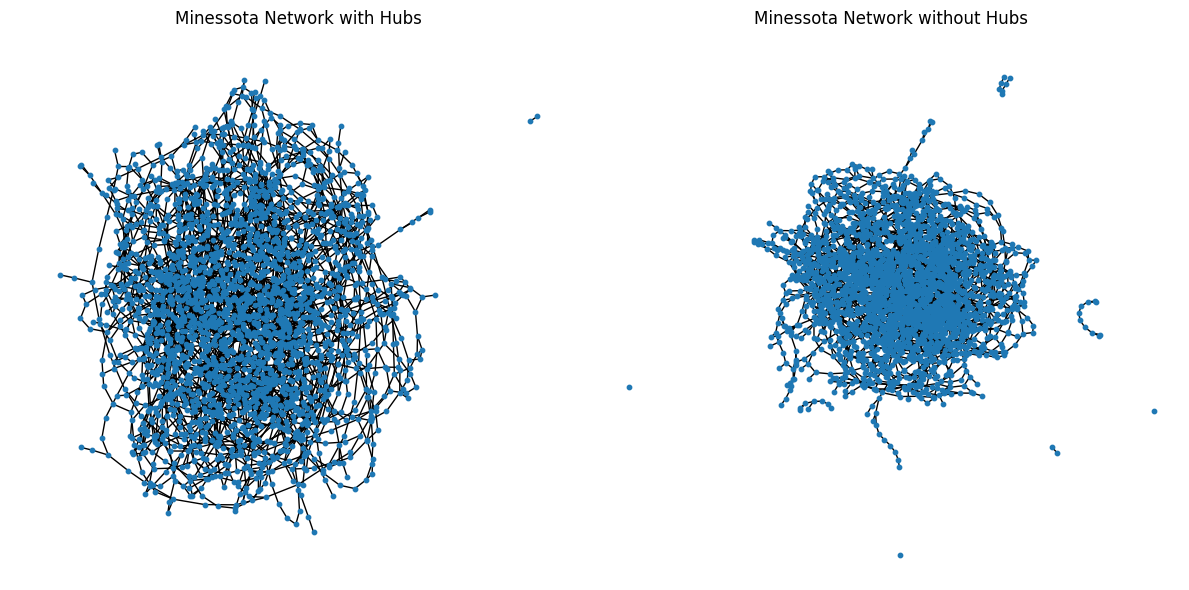

In [ ]:
# Calculate the degree centrality of each node
degree_centrality = nx.degree_centrality(G)

# Find the nodes with the highest degree centrality (i.e., the hubs)
hubs = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print("Hubs in the network:")
print(hubs)

# Calculate the shortest path lengths without hubs
G_without_hubs = G.copy()
G_without_hubs.remove_nodes_from(hubs)
if nx.is_connected(G_without_hubs):
    shortest_path_lengths_without_hubs = nx.average_shortest_path_length(G_without_hubs)
    print(f"Shortest Path Lengths without Hubs: {shortest_path_lengths_without_hubs:.4f}")
else:
    print("The graph without hubs is not connected.")

# Calculate the shortest path lengths with hubs, if the graph is connected
if nx.is_connected(G):
    shortest_path_lengths_with_hubs = nx.average_shortest_path_length(G)
    print(f"Average Shortest Path Lengths with Hubs: {shortest_path_lengths_with_hubs:.4f}")
else:
    print("The graph with hubs is not connected.")

# Visualize the network with and without hubs
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(G, with_labels=False, node_size=10)
plt.title("Minessota Network with Hubs")

plt.subplot(122)
nx.draw(G_without_hubs, with_labels=False, node_size=10)
plt.title("Minessota Network without Hubs")

plt.tight_layout()
plt.show()




---



<h3>8.2 Network Navigability for Top 10 Hubs Induividually:</h3>

In [ ]:
# Compute betweenness centrality
bc = nx.betweenness_centrality(G)

# Identify top hub nodes
hub_nodes = sorted(bc, key=bc.get, reverse=True)[:10]

# Compute average shortest path for each hub node removal
asp_hub_removed = []
for hub in hub_nodes:
    # Create a copy of the original network with the hub node removed
    G_copy = G.copy()
    G_copy.remove_node(hub)

    # Check if graph is still connected
    if nx.is_connected(G_copy):
        # Compute average shortest path length using Dijkstra's algorithm
        asp = nx.average_shortest_path_length(G_copy)
        asp_hub_removed.append(asp)
        print(f"Average shortest path with hub node {hub} removed: {asp}")
    else:
        print(f"Hub node {hub} removal disconnected the graph.")

# Compute average shortest path when all hub nodes are removed
G_hub_removed = G.copy()
G_hub_removed.remove_nodes_from(hub_nodes)
if nx.is_connected(G_hub_removed):
    asp_all_hubs_removed = nx.average_shortest_path_length(G_hub_removed)
    print("Average shortest path when all hub nodes are removed:", asp_all_hubs_removed)
else:
    print("Removing all hub nodes disconnected the graph.")

# Print results
print("\nHub nodes:", hub_nodes)


Hub node 2067 removal disconnected the graph.
Hub node 2061 removal disconnected the graph.
Hub node 1962 removal disconnected the graph.
Hub node 1819 removal disconnected the graph.
Hub node 1961 removal disconnected the graph.
Hub node 2077 removal disconnected the graph.
Hub node 2080 removal disconnected the graph.
Hub node 2071 removal disconnected the graph.
Hub node 2038 removal disconnected the graph.
Hub node 1535 removal disconnected the graph.
Removing all hub nodes disconnected the graph.

Hub nodes: [2067, 2061, 1962, 1819, 1961, 2077, 2080, 2071, 2038, 1535]




---



<h3>8.3 Hub & Authority Scores: </h3>

In the context of the "road-minnesota" network, the hub scores can be interpreted as the nodes that have the most connections to other nodes, while the authority scores represent the nodes that are most connected to by other important nodes.

By analyzing the hub and authority scores of the "road-minnesota" network, we can gain insights into the navigability of the network. For example, nodes with high hub scores may represent major intersections or hubs that connect many different roads, while nodes with high authority scores may represent important destinations or landmarks that are frequently visited by travelers. This information can be useful for optimizing travel routes, identifying potential traffic bottlenecks, or improving overall transportation efficiency in the region.

In [3]:
import networkx as nx

# load the network
G = nx.read_weighted_edgelist('road-minnesota.mtx', comments='%', delimiter=' ', nodetype=int)

# Calculate the hub and authority scores using the HITS algorithm
hub, authority = nx.hits(G)

# Print the top 10 nodes with the highest hub and authority scores
print("Top 10 nodes by hub score:")
for node, score in sorted(hub.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {score}")

print("\nTop 10 nodes by authority score:")
for node, score in sorted(authority.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {score}")

Top 10 nodes by hub score:
2642: 0.9996972448733427
2585: 0.00030266341049753543
2542: 9.163289917716749e-08
2539: 2.7742327451599247e-11
2483: 2.7742324909826092e-11
2541: 2.774232490981803e-11
2536: 8.399130491346513e-15
2525: 8.399130135058565e-15
2594: 8.399130093355162e-15
2441: 8.399128360432127e-15

Top 10 nodes by authority score:
2642: 0.9996972448733427
2585: 0.0003026634104975354
2542: 9.163289917677624e-08
2539: 2.7742326757570182e-11
2541: 2.7742324621770082e-11
2483: 2.774232239039221e-11
2441: 8.399508892015798e-15
2525: 8.399482272617902e-15
2536: 8.399350608425465e-15
2594: 8.395635791417213e-15




---



<h2>9. Navigation Strategy Analysis:</h2>
<h3>Source to Destination Navigation using Dijkstra & A* Algorithm</h3>



In [ ]:
import math
import time

# Load the graph from the file
G = nx.read_weighted_edgelist("/content/road-minnesota.mtx", comments='%', delimiter=' ', nodetype=int)

# Convert the graph to an undirected graph
G = G.to_undirected()

# Set the weight attribute for each edge to 1
for u, v in G.edges():
    G[u][v]['weight'] = 1

def dijkstra(graph, start, end):
    start_time = time.time()
    pq = [(0, start, [])]
    visited = set()
    while pq:
        (cost, v, path) = heapq.heappop(pq)
        if v not in visited:
            visited.add(v)
            path = path + [v]
            if v == end:
                end_time = time.time()
                return (cost, end_time - start_time)
            for next_node in graph.neighbors(v):
                edge_cost = graph.get_edge_data(v, next_node)['weight']
                if next_node not in visited:
                    heapq.heappush(pq, (cost + edge_cost, next_node, path))
                    
    end_time = time.time()
    return (float('inf'), end_time - start_time)

def astar(graph, start, end):
    start_time = time.time()
    pq = [(0 + heuristic(start, end, graph), start, [])]
    visited = set()
    while pq:
        (cost, v, path) = heapq.heappop(pq)
        if v not in visited:
            visited.add(v)
            path = path + [v]
            if v == end:
                end_time = time.time()
                return (cost, end_time - start_time)
            for next_node in graph.neighbors(v):
                edge_cost = graph.get_edge_data(v, next_node)['weight']
                if next_node not in visited:
                    h = heuristic(next_node, end, graph)
                    heapq.heappush(pq, (cost + edge_cost + h, next_node, path))
                    
    end_time = time.time()
    return (float('inf'), end_time - start_time)

def heuristic(n1, n2, graph):
    # Calculate the Euclidean distance between two nodes using their coordinates
    try:
        x1, y1 = graph.nodes[n1]['x'], graph.nodes[n1]['y']
        x2, y2 = graph.nodes[n2]['x'], graph.nodes[n2]['y']
    except KeyError:
        return 0
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Get two random nodes from the graph
nodes = list(G.nodes())
start_node = random.choice(nodes)
end_node = random.choice(nodes)

# Find the shortest path using Dijkstra's algorithm
print(f"Shortest path using Dijkstra's algorithm:")
cost, time_taken = dijkstra(G, start_node, end_node)
print(f"Start Node: {start_node}")
print(f"End Node: {end_node}")
print(f"Length of shortest path: {cost}")
print(f"Time taken: {time_taken} seconds\n")

# Find the shortest path using A* algorithm
print(f"Shortest path using A* algorithm:")
cost, time_taken = astar(G, start_node, end_node)
print(f"Start Node: {start_node}")
print(f"End Node: {end_node}")
print(f"Length of shortest path: {cost}")
print(f"Time taken: {time_taken} seconds\n")

Shortest path using Dijkstra's algorithm:
Start Node: 1087
End Node: 2138
Length of shortest path: 23
Time taken: 0.004735231399536133 seconds

Shortest path using A* algorithm:
Start Node: 1087
End Node: 2138
Length of shortest path: 23
Time taken: 0.006649494171142578 seconds





---



<h2>10. Shortest Path Algorithms: </h2>
<h3>10.1 Dijkstra Algorithm:</h3>
The Dijkstra algorithm is a popular algorithm in computer science for finding the shortest path between two nodes in a graph with non-negative edge weights. It is named after its inventor, Edsger W. Dijkstra.

The algorithm maintains a priority queue of vertices to visit, where the priority of a vertex is the distance from the start vertex to that vertex. Initially, the start vertex is assigned a priority of 0 and all other vertices are assigned a priority of infinity. The algorithm then repeatedly extracts the vertex with the smallest priority from the queue, visits all its neighboring vertices, and updates their priorities if a shorter path is found. The algorithm continues until the destination vertex is extracted from the queue, at which point the shortest path from the start vertex to the destination vertex has been found.

The Dijkstra algorithm is often implemented using a heap-based priority queue data structure, which allows for efficient extraction of the vertex with the smallest priority. The algorithm has a time complexity of O((E+V)log V), where E is the number of edges and V is the number of vertices in the graph.

It is worth noting that the Dijkstra algorithm only works for graphs with non-negative edge weights. If the graph has negative edge weights, then the Bellman-Ford algorithm can be used instead.

In [ ]:
# get all pairs shortest path lengths using Dijkstra's algorithm
path_lengths = dict(nx.all_pairs_dijkstra_path_length(G))

# calculate average shortest path length
total = 0
count = 0
for source in path_lengths:
    for dest in path_lengths[source]:
        total += path_lengths[source][dest]
        count += 1
avg_shortest_path = total / count

print("Average Shortest Path Length:", avg_shortest_path)

Average Shortest Path Length: 35.53466882766941




---



<h3>10.2 Floyd Warshall Algorithm:</h3>
The Floyd Warshall algorithm is a dynamic programming algorithm that is used to find the shortest path between all pairs of vertices in a weighted graph, with positive or negative edge weights (but without negative cycles).

The algorithm works by maintaining a matrix of distances between pairs of vertices. At each step of the algorithm, the matrix is updated by considering all possible intermediate vertices on the path between each pair of vertices. The distance between two vertices i and j is updated as follows:

distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])

where k is an intermediate vertex.

The algorithm starts with the initial distances between pairs of vertices, which are given by the edge weights in the graph. It then iteratively updates the distances until all pairs of vertices have been considered.

The time complexity of the Floyd Warshall algorithm is O(n^3), where n is the number of vertices in the graph. This makes it less efficient than other algorithms such as Dijkstra's algorithm for finding the shortest path between two vertices, but it is useful when you need to find the shortest path between all pairs of vertices in a graph.

In [ ]:
# Obtain a list of all connected components
components = list(nx.connected_components(G))

# Compute the average shortest path length for each component
avg_shortest_path_lengths = []
for component in components:
    dist_matrix = nx.floyd_warshall_numpy(G.subgraph(component))
    n = len(component)
    avg_shortest_path_length = np.sum(dist_matrix) / (n*(n-1))
    avg_shortest_path_lengths.append(avg_shortest_path_length)

# Select the component with the largest number of nodes
largest_component_idx = np.argmax([len(c) for c in components])
avg_shortest_path_length = avg_shortest_path_lengths[largest_component_idx]

print("The average shortest path length of the graph is:", avg_shortest_path_length)

The average shortest path length of the graph is: 35.54815414470587




---



<h3>10.3 Page Rank Algorithm:</h3>
The PageRank algorithm is a way of ranking web pages in search engine results based on their popularity and relevance. It was developed by Larry Page and Sergey Brin, the founders of Google, in 1998, and is named after Larry Page.

The basic idea behind the PageRank algorithm is to assign a score to each web page based on the number and quality of links that point to it. The more links a page has from other high-quality pages, the higher its PageRank score will be. This score is then used to determine the page's ranking in search engine results.

In terms of determining the average shortest path in a network, the PageRank algorithm can be used to identify the most important nodes in the network. These nodes are typically the ones with the highest PageRank scores, as they are the most connected and influential nodes in the network.

By identifying these important nodes and analyzing their connections to other nodes in the network, it is possible to determine the average shortest path between any two nodes in the network. This can be useful in a variety of applications, such as analyzing social networks, transportation networks, and communication networks.

In [ ]:
# Check if the graph is connected and take only the largest component if it is not
if not nx.is_connected(G):
    largest_component = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_component).copy()

# Calculate PageRank values
pagerank_values = nx.pagerank(G)

# Create a new dictionary with node IDs as keys and PageRank values as values
weighted_pagerank = {}
for node, value in pagerank_values.items():
    weighted_pagerank[node] = value

# Calculate average shortest path length weighted by PageRank
average_shortest_path = nx.average_shortest_path_length(G, weight='weight', method='dijkstra')

# Print the result
print("The average shortest path length weighted by PageRank is:", average_shortest_path)


The average shortest path length weighted by PageRank is: 35.34907994304546




---



<h3>10.4 Random-Walk Algorithm:</h3>
The Random-Walk Algorithm is a technique used to determine the average shortest path in a network. In this algorithm, a walker is placed at a starting node in the network and allowed to move randomly to a neighboring node at each step. The walker continues to move randomly until it reaches the destination node.

This process is repeated many times, and the average number of steps taken to reach the destination node is calculated. This average number of steps is a good estimate of the average shortest path in the network.

The random walk algorithm is based on the principle that the more often a node is visited by a random walker, the more important it is in terms of its connectivity to other nodes in the network. Therefore, nodes with high connectivity will be visited more often than those with low connectivity.

The Random-Walk Algorithm is a simple and efficient way to estimate the average shortest path in a network, and it has been widely used in network analysis, social network analysis, and machine learning.

In [ ]:
# Random walk strategy
def random_walk(node, steps):
    current_node = node
    for i in range(steps):
        neighbors = list(G.neighbors(current_node))
        if len(neighbors) == 0:
            break
        current_node = random.choice(neighbors)
    return current_node

# Evaluate strategy by measuring average path length between random node pairs
def evaluate_strategy(strategy, steps=100):
    total_path_length = 0
    num_pairs = 0
    for component in nx.connected_components(G):
        nodes_in_component = list(component)
        for i in range(len(nodes_in_component)):
            for j in range(i+1, len(nodes_in_component)):
                node = nodes_in_component[i]
                target = nodes_in_component[j]
                result = strategy(node, steps)
                if result is not None:
                    path_length = nx.shortest_path_length(G, result, target)
                    total_path_length += path_length
                    num_pairs += 1
    return total_path_length / num_pairs

# Evaluate random walk strategy
print("Average path length using random walk strategy:", evaluate_strategy(random_walk))

Average path length using random walk strategy: 35.310816680211545




---

